In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Visualization

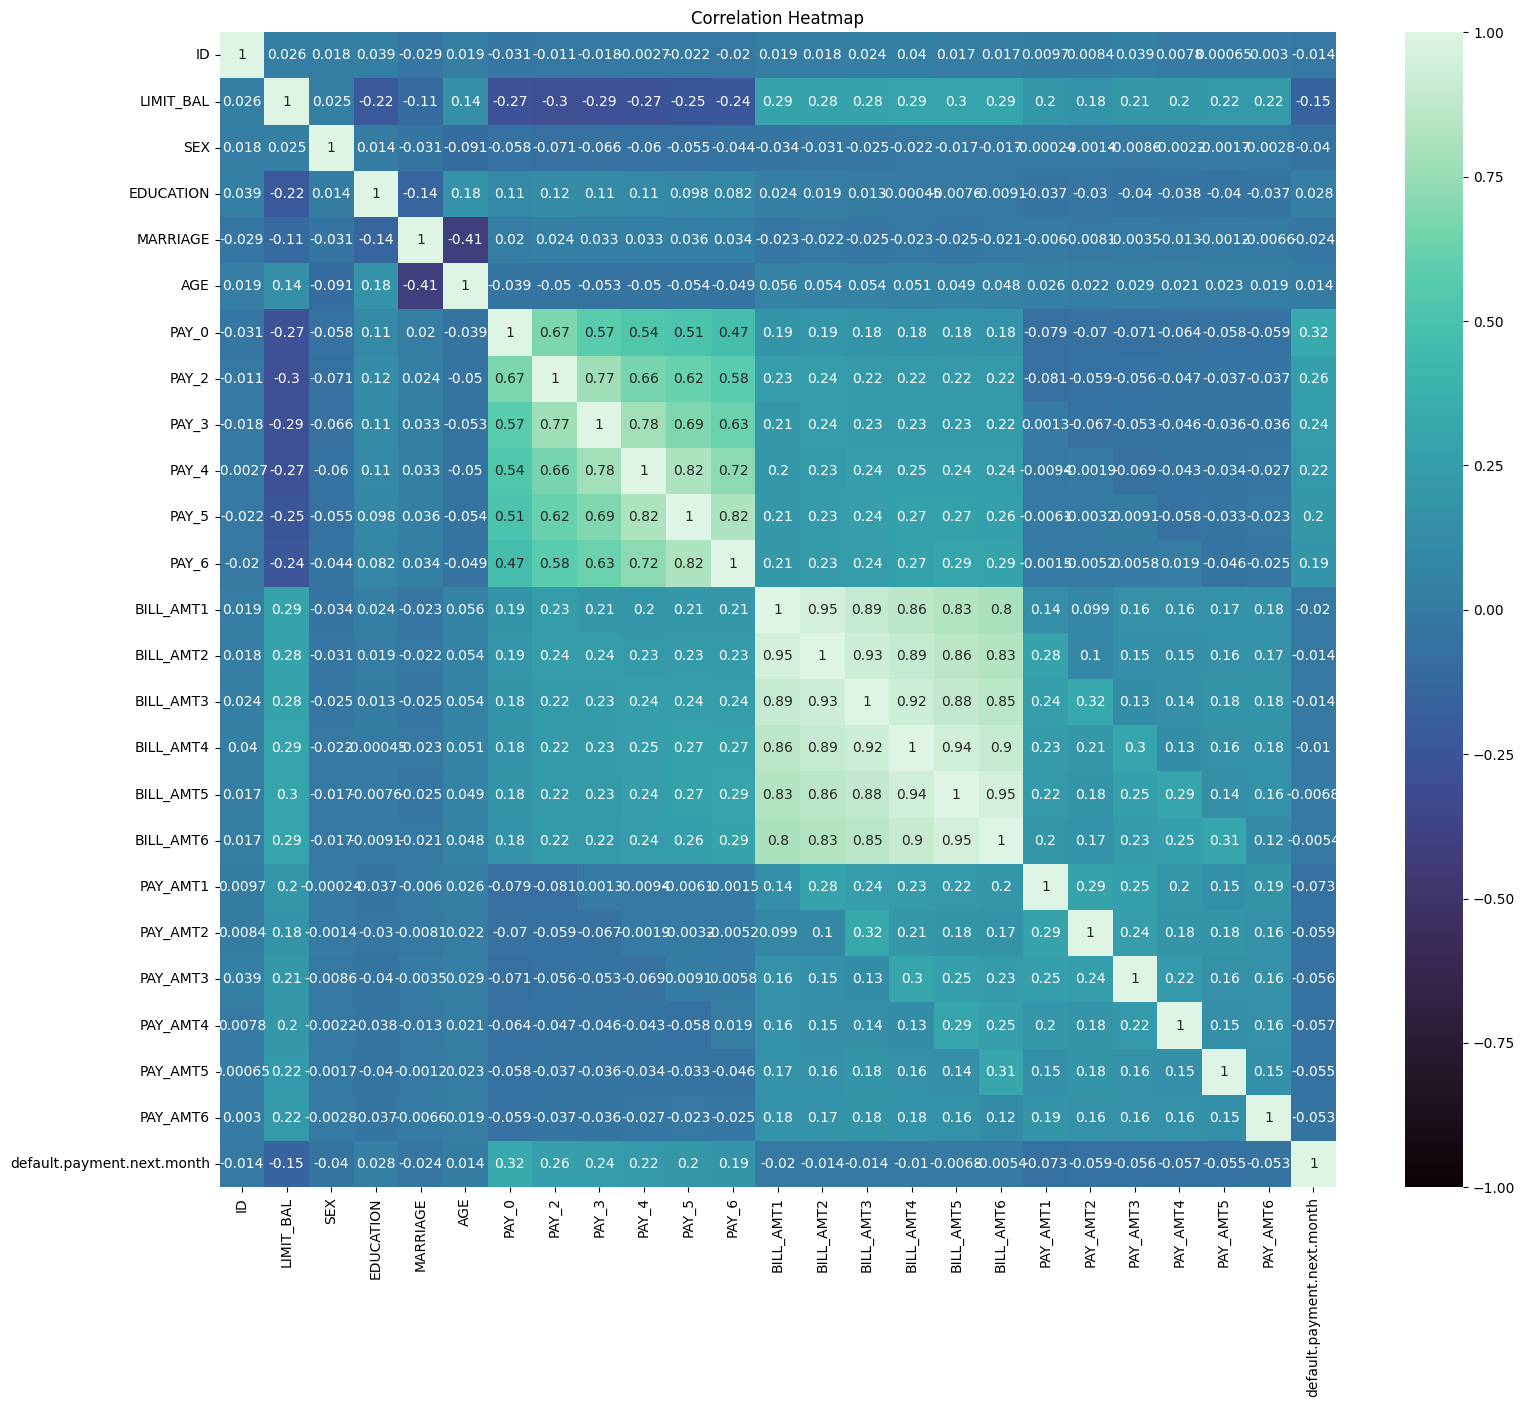

In [ ]:
corr = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(18, 15))
sns.pairplot(df,hue='default.payment.next.month')
plt.show()

In [ ]:
for col in df.columns:
  print(col, ":", len(df[col].unique()))

ID : 30000
LIMIT_BAL : 81
SEX : 2
EDUCATION : 7
MARRIAGE : 4
AGE : 56
PAY_0 : 11
PAY_2 : 11
PAY_3 : 11
PAY_4 : 11
PAY_5 : 10
PAY_6 : 10
BILL_AMT1 : 22723
BILL_AMT2 : 22346
BILL_AMT3 : 22026
BILL_AMT4 : 21548
BILL_AMT5 : 21010
BILL_AMT6 : 20604
PAY_AMT1 : 7943
PAY_AMT2 : 7899
PAY_AMT3 : 7518
PAY_AMT4 : 6937
PAY_AMT5 : 6897
PAY_AMT6 : 6939
default.payment.next.month : 2


In [ ]:
categorical_cols = [col for col in df.columns if len(df[col].unique())<12 and col!='default.payment.next.month']
categorical_cols

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

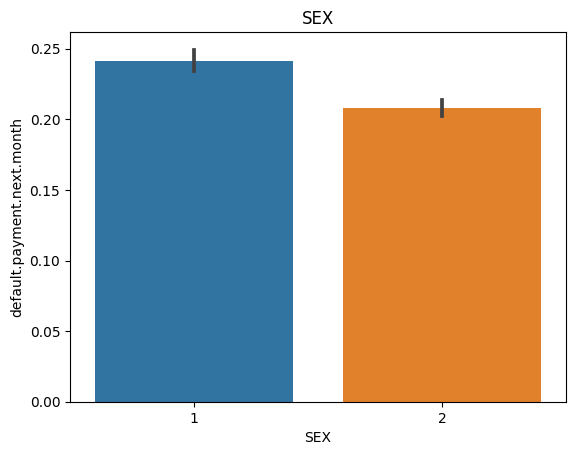

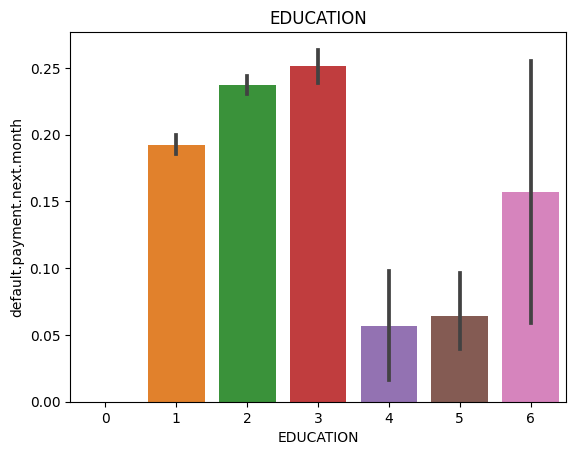

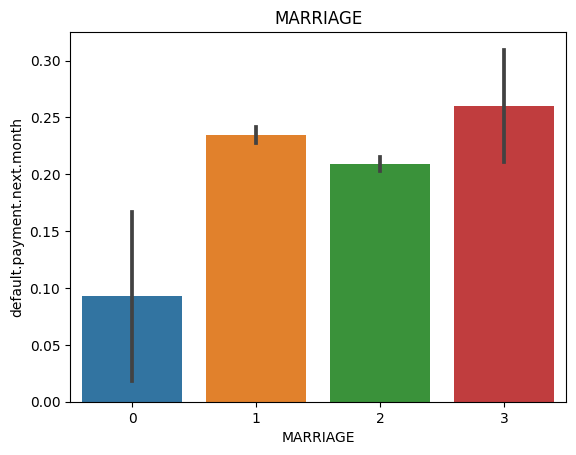

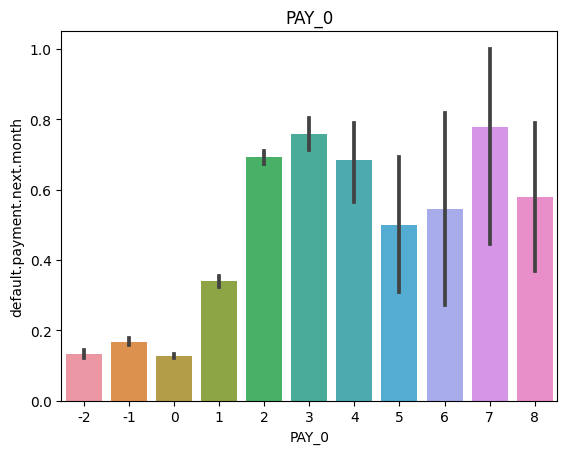

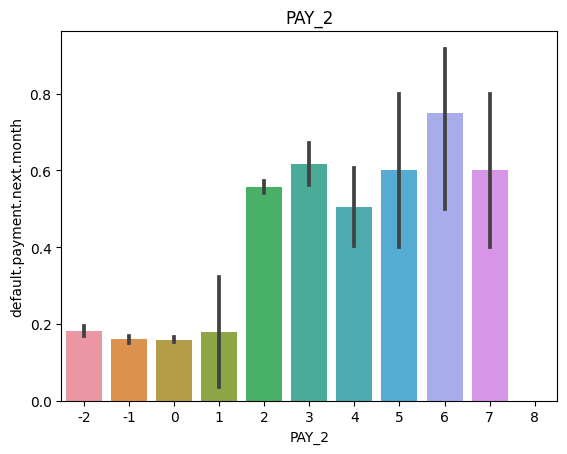

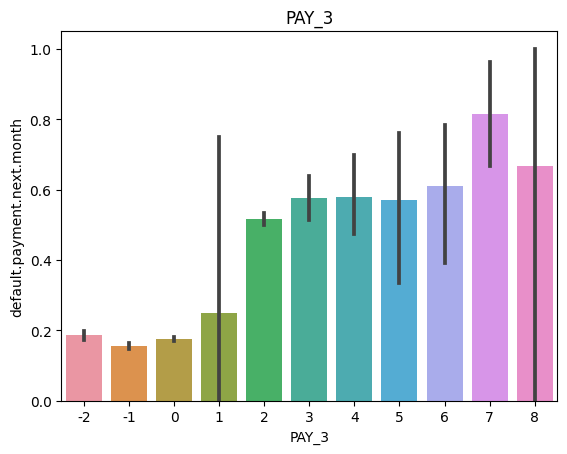

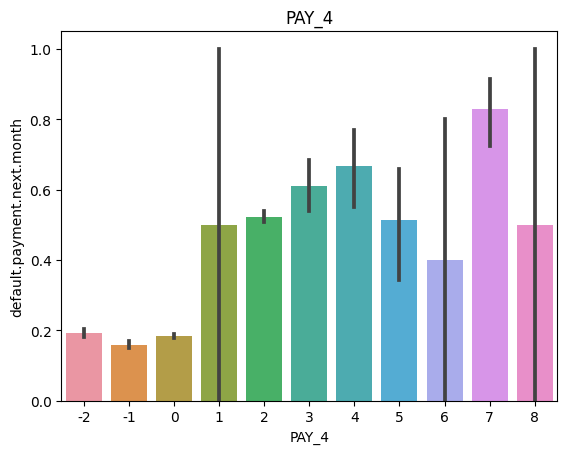

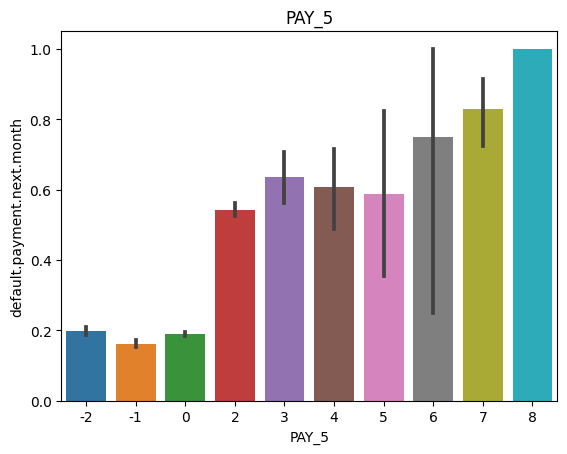

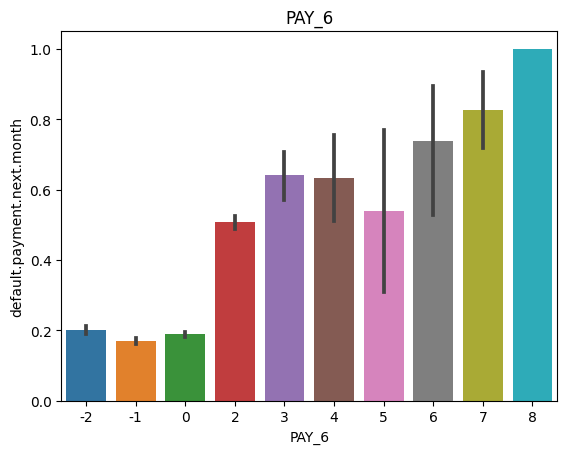

In [ ]:
for col in categorical_cols:
  sns.barplot(x=df[col], y = df['default.payment.next.month'])
  plt.title(col)
  plt.show()

In [ ]:
numerical_cols = [col for col in df.columns if col not in categorical_cols and col!='default.payment.next.month']
numerical_cols

['ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

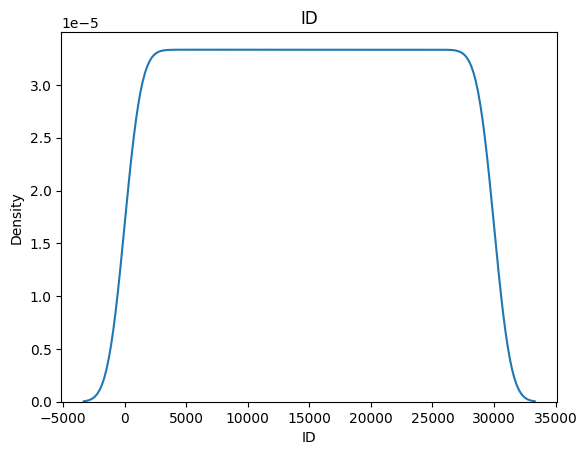

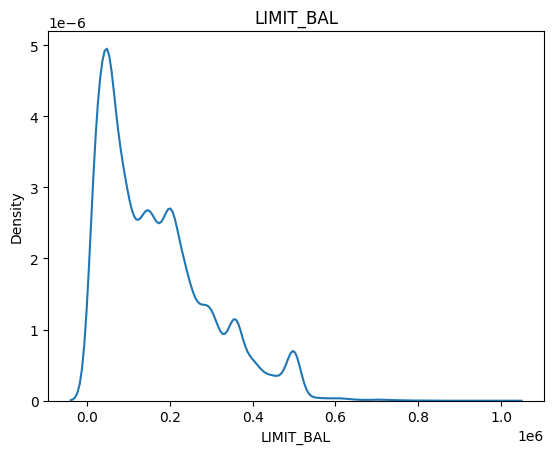

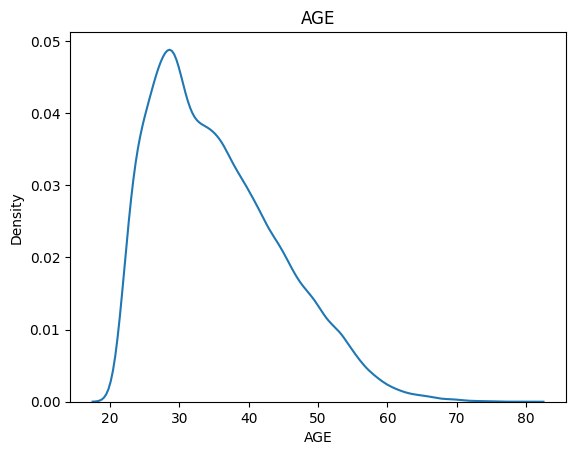

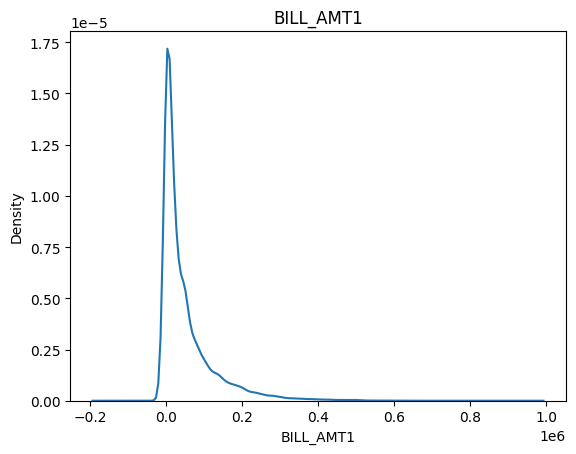

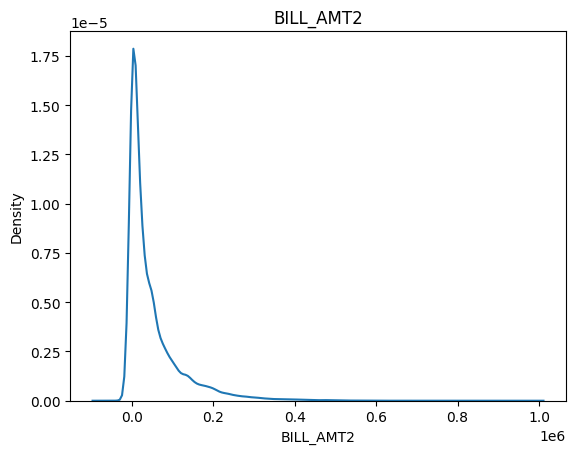

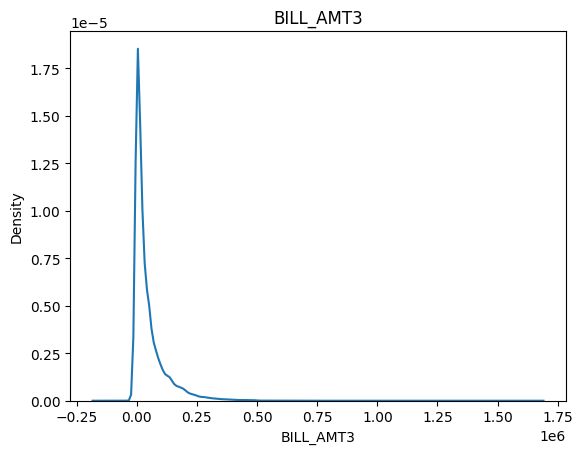

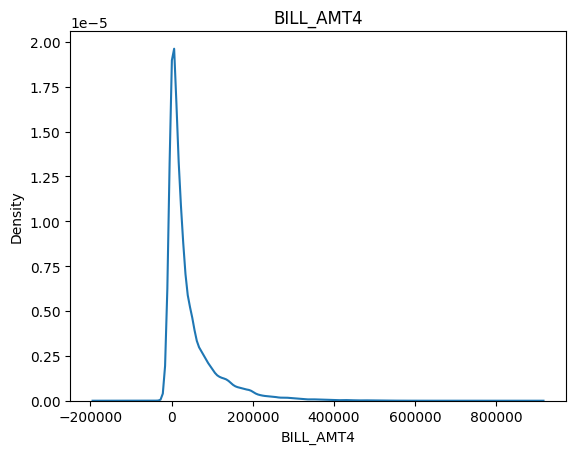

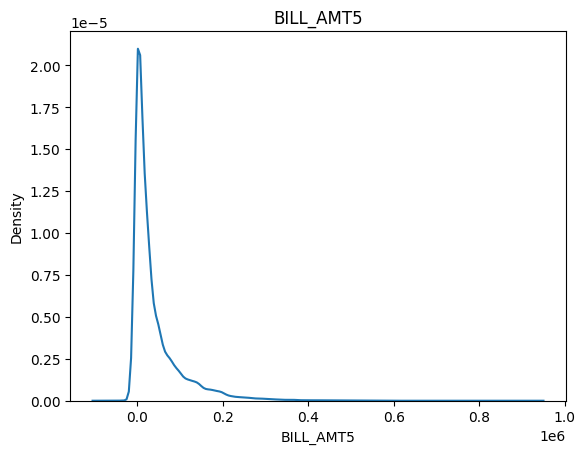

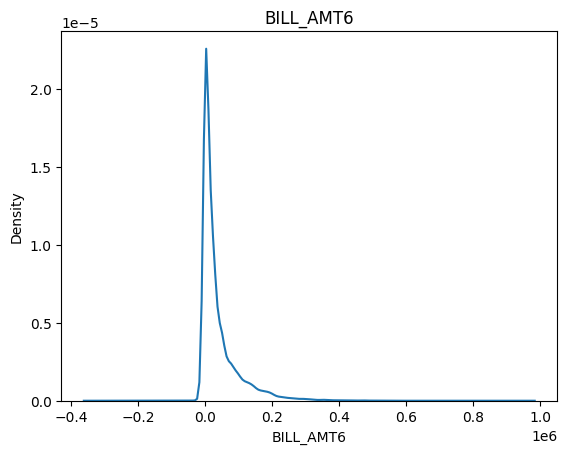

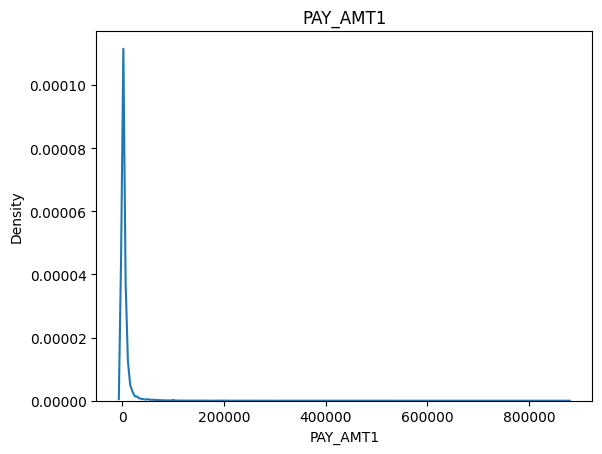

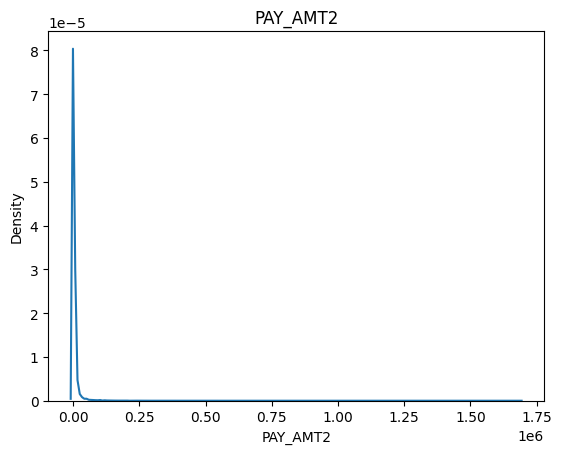

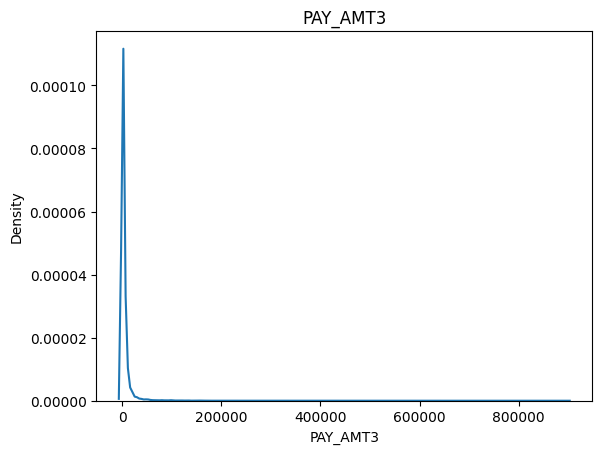

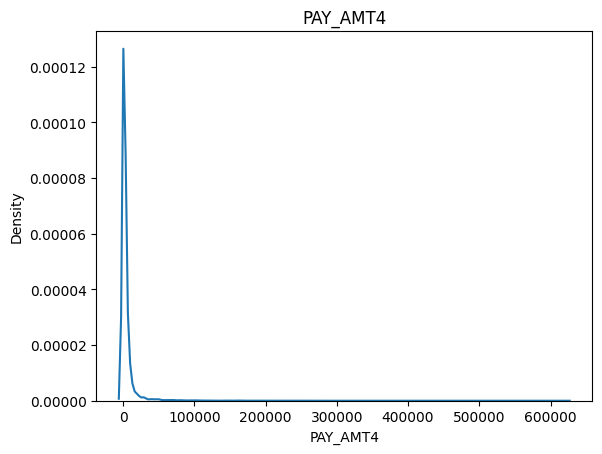

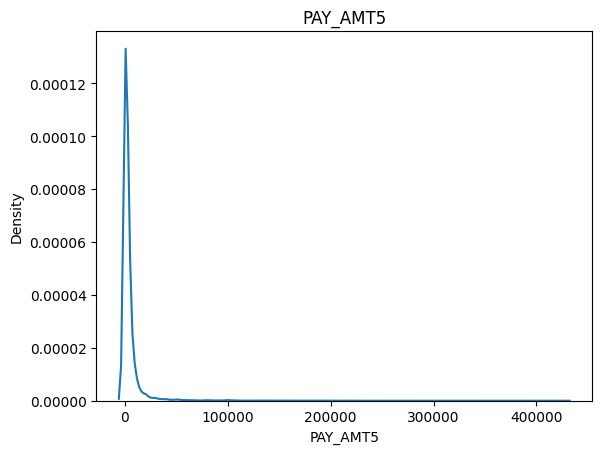

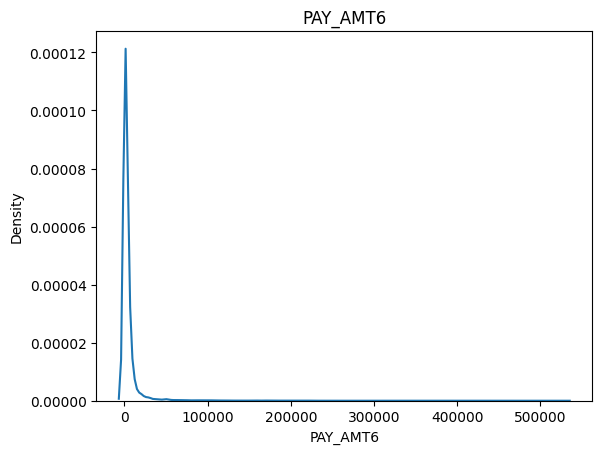

In [ ]:
for col in numerical_cols:
  sns.kdeplot(df[col])
  plt.title(col)
  plt.show()  

# Preprocessing 


In [ ]:
X = df.drop(columns=['ID', 'default.payment.next.month'])
y = df['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [ ]:
nominal_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_cols = [col for col in X.columns if col not in nominal_cols]

In [ ]:
numerical_cols

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
numerical_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('nominalencoder', OneHotEncoder(sparse=False,handle_unknown='ignore')),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ('numerical_pipeline', numerical_pipeline, numerical_cols),
    ('categorical_pipeline', categorical_pipeline, nominal_cols)
])

In [ ]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train.head()

,numerical_pipeline__LIMIT_BAL,numerical_pipeline__AGE,numerical_pipeline__PAY_0,numerical_pipeline__PAY_2,numerical_pipeline__PAY_3,numerical_pipeline__PAY_4,numerical_pipeline__PAY_5,numerical_pipeline__PAY_6,numerical_pipeline__BILL_AMT1,numerical_pipeline__BILL_AMT2,numerical_pipeline__BILL_AMT3,numerical_pipeline__BILL_AMT4,numerical_pipeline__BILL_AMT5,numerical_pipeline__BILL_AMT6,numerical_pipeline__PAY_AMT1,numerical_pipeline__PAY_AMT2,numerical_pipeline__PAY_AMT3,numerical_pipeline__PAY_AMT4,numerical_pipeline__PAY_AMT5,numerical_pipeline__PAY_AMT6,categorical_pipeline__SEX_1,categorical_pipeline__SEX_2,categorical_pipeline__EDUCATION_0,categorical_pipeline__EDUCATION_1,categorical_pipeline__EDUCATION_2,categorical_pipeline__EDUCATION_3,categorical_pipeline__EDUCATION_4,categorical_pipeline__EDUCATION_5,categorical_pipeline__EDUCATION_6,categorical_pipeline__MARRIAGE_0,categorical_pipeline__MARRIAGE_1,categorical_pipeline__MARRIAGE_2,categorical_pipeline__MARRIAGE_3
0,-1.139003,-1.031921,-0.872883,-0.720412,-0.694606,-0.665419,-1.532938,-0.618300,-0.671877,-0.670261,-0.667972,-0.683707,-0.669670,-0.629882,-0.259967,-0.219680,-0.284034,-0.262225,-0.169920,-0.289958,1.231086,-1.231086,-0.020706,-0.741033,1.066492,-0.439602,-0.06375,-0.098798,-0.039672,-0.044229,-0.910204,0.933626,-0.103835
1,-0.138540,0.599775,0.901613,-1.558100,-0.694606,-0.665419,-0.647261,-1.488736,-0.693935,-0.690625,-0.651531,-0.586762,-0.662746,-0.652089,-0.333370,-0.166585,0.008592,-0.313948,-0.305063,-0.289958,1.231086,-1.231086,-0.020706,1.349468,-0.937654,-0.439602,-0.06375,-0.098798,-0.039672,-0.044229,1.098654,-1.071093,-0.103835
2,0.631048,-0.705581,1.788862,1.792653,1.821359,1.910872,2.009769,1.993008,0.989112,1.084703,1.124524,1.227215,1.416612,1.498716,0.010071,-0.060316,-0.284034,0.080871,-0.057618,-0.021965,-0.812291,0.812291,-0.020706,1.349468,-0.937654,-0.439602,-0.06375,-0.098798,-0.039672,-0.044229,-0.910204,0.933626,-0.103835
3,1.477594,0.382216,0.901613,-1.558100,-1.533261,-1.524183,-0.647261,-0.618300,-0.691242,-0.687837,-0.674425,-0.671125,-0.651354,-0.533990,-0.333370,-0.237431,-0.284034,-0.268127,0.140338,-0.289958,1.231086,-1.231086,-0.020706,1.349468,-0.937654,-0.439602,-0.06375,-0.098798,-0.039672,-0.044229,1.098654,-1.071093,-0.103835
4,0.861924,0.926114,0.014365,0.117276,0.144049,0.193345,0.238416,0.252136,1.462959,1.600834,1.080023,1.177725,1.212598,1.283075,0.121951,-0.059174,-0.055687,-0.028477,-0.038076,-0.067667,1.231086,-1.231086,-0.020706,-0.741033,1.066492,-0.439602,-0.06375,-0.098798,-0.039672,-0.044229,1.098654,-1.071093,-0.103835


# Training and Tunning


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import accuracy_score
def score(y_true, y_pred):
  return accuracy_score(y_true, y_pred)

In [ ]:
models = {
    LogisticRegression(): 'Logistic Regression',
    SVC(kernel='rbf', C=10, degree=5, gamma='auto'): "Support vector",
    KNeighborsClassifier(n_neighbors=20): 'Knn classifier',
    DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=2, max_features='sqrt', max_depth=8, criterion='entropy'): 'Decision Tree',
    RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=4, min_samples_leaf=5, max_features='sqrt'): 'Random Forest',
    GaussianNB(): 'Naiye Bayes'
}

for model in models.keys():
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  scores = score(y_test, y_pred)

  print(models[model])
  print("Model Training Performance")
  print("scores : ", scores*100)
  print("=======================================\n")

Logistic Regression
Model Training Performance
scores :  81.42222222222222

Support vector
Model Training Performance
scores :  81.94444444444444

Knn classifier
Model Training Performance
scores :  81.36666666666666

Decision Tree
Model Training Performance
scores :  81.92222222222222

Random Forest
Model Training Performance
scores :  82.12222222222222

Naiye Bayes
Model Training Performance
scores :  27.52222222222222



In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn, X, y,cv=10)
  accuracy_rate.append(score.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

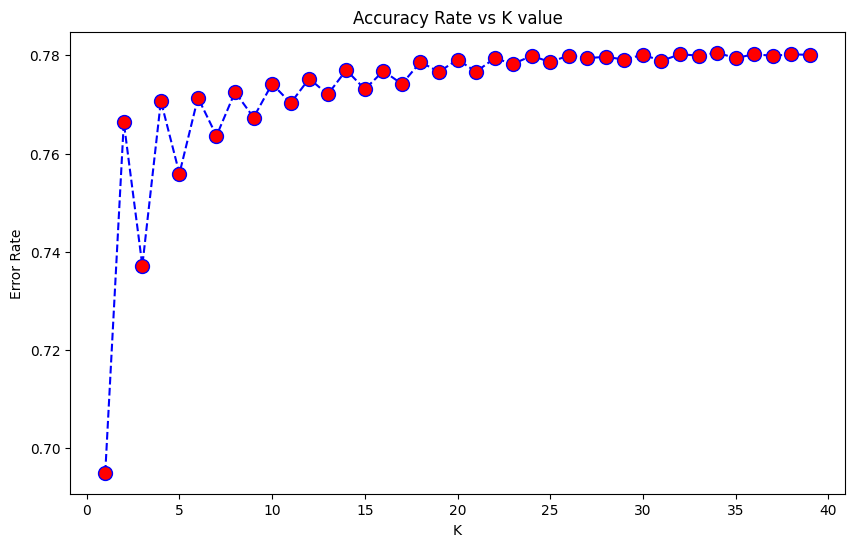

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

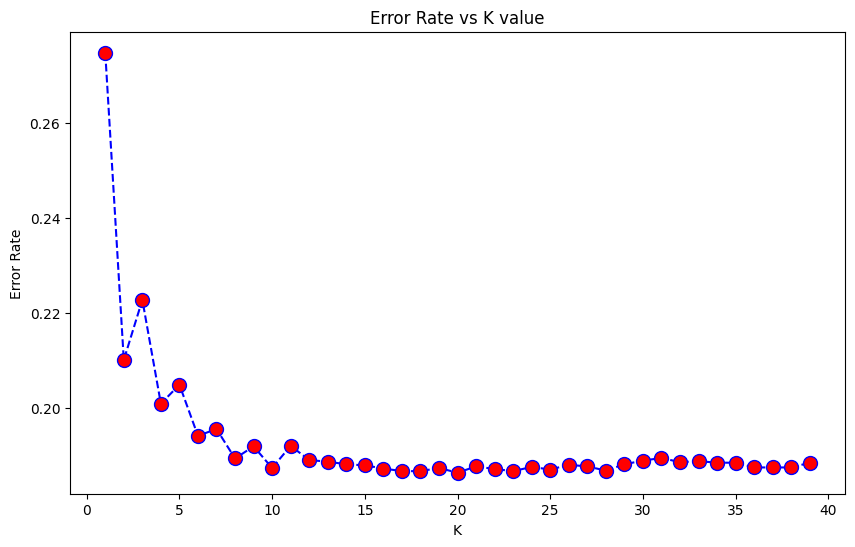

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.8136666666666666

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
forest = RandomForestRegressor()
params = {'n_estimators': [50,100,150,200],
          'max_depth': [8,10,15,20,None],
          'min_samples_split': [4,5,10,15,20],
          'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_leaf':[2,5,10]}

forest_reg = RandomizedSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)
forest_reg.fit(X_train, y_train)
print(forest_reg.best_params_)
print(forest_reg.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10}
-0.13505677947278322


In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=4, min_samples_leaf=5, max_features='sqrt')
rf.fit(X_train, y_train)
accuracy_score(y_test, rf.predict(X_test))

0.8231111111111111

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [8,10,15,20,None],
          'min_samples_split': [4,5,10,15,20],
          'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_leaf':[2,5,10]}

tree_c = RandomizedSearchCV(tree, params, cv=5, scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)
tree_c.fit(X_train, y_train)
print(tree_c.best_params_)
print(tree_c.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}
-0.18514285714285714


In [ ]:
tr = DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=2, max_features='sqrt', max_depth=8, criterion='entropy')
tr.fit(X_train, y_train)
accuracy_score(y_test, tr.predict(X_test))

0.8152222222222222

In [ ]:
sv = SVC()
params = {
    "C": [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [3,4,5,6,7],
    'gamma': ['scale', 'auto']
}

sv_c = RandomizedSearchCV(sv, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
sv_c.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}
-0.18514285714285714


In [ ]:
print(sv_c.best_params_)
print(sv_c.best_score_)

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 5, 'C': 10}
0.8143333333333335
